# Chapter 8: Support Vector Machine (SVM)

โค้ดตัวอย่างการสร้างโมเดล Support Vector Machine (SVM) ในการจำแนกประเภทดอกไอริสจากฟีเจอร์ ตัวอย่างนี้ใช้ชุดข้อมูล [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) โค้ดถูกเขียนโดยใช้ไลบรารี่ [`scikit-learn`](https://scikit-learn.org/)

**Reference**: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

### ขั้นตอน
1. Import Package and Module
2. Load Dataset
3. Train SVM model
4. Discussion

## 1. Import Package and Module

ทำการนำเข้าแพ็กเกจและโมดูลที่จำเป็นต้องใช้อย่าง scikit-learn (sklearn) และ Keras ส่วน Matplotlib ใช้สำหรับแสดงผล

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

## 2. Load Dataset

ทำการโหลดชุดข้อมูล Iris Dataset ซึ่งประกอบไปด้วยตัวอย่าง 150 ตัวอย่าง จากดอกไอริส 3 ประเภท คือ Setosa, Versicolour, และ Virginica ชนิดละ 50 ตัวอย่าง โดยแต่ละตัวอย่างจะมีฟีเจอร์ 4 อย่างคือ Sepal Length, Sepal Width, Petal Length and Petal Width  

โดยในตัวอย่างนี้จะใช้เฉพาะฟีเจอร์ Sepal Length และ Sepal Width เพื่อให้สะดวกต่อการแสดงผลลัพธ์ และตัวอย่างข้อมูลประเภท Setosa และ Versicolour เท่านั้น เพื่อให้เป็นโจทย์ Binary Classification

In [2]:
iris = datasets.load_iris()
# Take the first two features and leave out Setosa.
y = iris.target
X = iris.data[y != 2, :2]
y = y[y != 2]

## 3. Train SVM model

เริ่มต้นจากการกำหนด Hyperparameter ของ [`SVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) เช่น Kernel เป็น Linear และ Regularization parameter (C) เป็น 1 แล้วเรียกฟังก์ชัน [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit) เพื่อสร้างโมเดล

In [3]:
model = svm.SVC(kernel="linear", C=1)
model = model.fit(X, y)

## 4. Discussion

กราฟแสดง Decision Boundary โดยใช้ [`DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) ของโมเดล SVM โดยจุดสีน้ำเงิน คือ ข้อมูลประเภท Setosa และจุดสีแดงคือ ข้อมูลประเภท Versicolour  แกน x แสดง Sepal Length ส่วนแกน y แสดง Sepal Width  เส้นทึกสีดำคือ Decision Boundary ส่วนเส้นประแสดง Margin  ส่วนจุดที่วงกลมไว้ คือ Support Vector

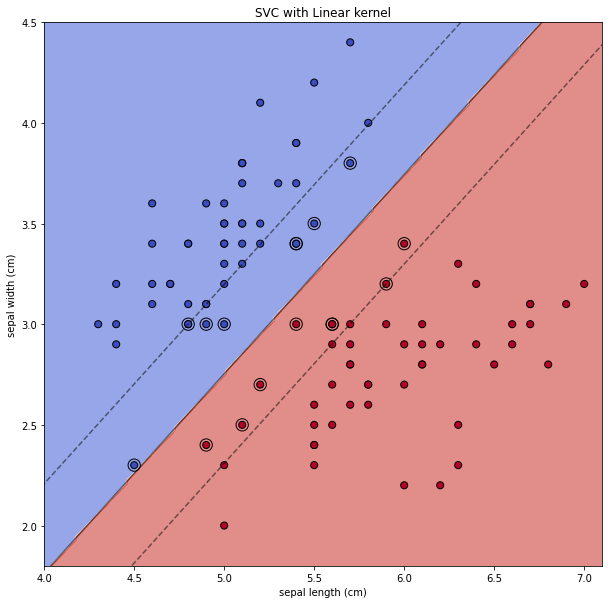

In [4]:
#@title
idx = model.support_

fig, ax = plt.subplots(figsize=(10,10))
# draw decision boundary
DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
# fill color to decision area
disp = DecisionBoundaryDisplay.from_estimator(
    model, 
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.6,
    ax=ax,
    grid_resolution=300,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
# plot data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
# circle support vectors
ax.scatter(X[idx, 0], X[idx, 1], s=150, facecolors="none", zorder=10, edgecolor="k")

ax.set_xlim((4,7.1))
ax.set_ylim((1.8,4.5))
ax.set_title("SVC with Linear kernel")

plt.show()

----